In [43]:
from typing_extensions import TypedDict, List
from typing import Annotated
from langgraph.graph import add_messages

class State(TypedDict):
    """
    Represents the state of the graph.
    """
    
    messages : Annotated[List, add_messages]

In [44]:
from langchain_groq import ChatGroq
import os
from dotenv import load_dotenv
load_dotenv()

class GroqLLM:
    def get_llm_model(model_name="llama-3.3-70b-versatile", api_key=None):
        # Fetch the API key from environment if not specified
        if api_key is None:
            api_key = os.environ.get("GROQ_API_KEY")

        if not api_key:
            raise ValueError("GROQ_API_KEY is not set in the environment or passed as an argument.")

        return ChatGroq(api_key=api_key, model=model_name)

In [45]:
def tool_llm(state: State):
    return {"messages":[GroqLLM.get_llm_model().invoke(state["messages"])]}

In [46]:
#This file be responsible for building the graph

from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

class GraphBuilder:
  def __init__(self):
    
    self.graph_builder = StateGraph(State)
    self.llm = GroqLLM.get_llm_model()
    
  def negotiator_graph(self):
    #tools
    
    #nodes
    ##TODO: remove hardcoded strings and implement real functions to use
    self.graph_builder.add_node("parser", tool_llm)
    self.graph_builder.add_node("classifier", tool_llm)
    self.graph_builder.add_node("validator", tool_llm)
    self.graph_builder.add_node("analyzer", tool_llm)
    self.graph_builder.add_node("generator", tool_llm)
    
    
    #edges
    self.graph_builder.add_edge(START, "parser")
    self.graph_builder.add_edge("parser", "classifier")
    self.graph_builder.add_edge("classifier", "validator")
    self.graph_builder.add_edge("validator", "analyzer")
    self.graph_builder.add_edge("analyzer", "generator")
    self.graph_builder.add_edge("generator", END)
    
    return self.graph_builder.compile()

  def show_graph(self):
      display(Image(self.graph_builder.get_graph().draw_mermaid_png()))

In [47]:
builder = GraphBuilder()

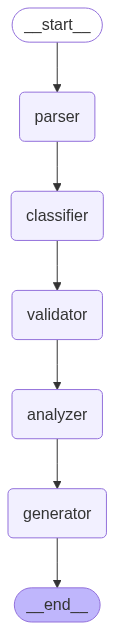

In [48]:
compiled_graph = builder.negotiator_graph()
display(Image(compiled_graph.get_graph().draw_mermaid_png()))  # (if get_graph exists for the compiled graph only))
